## <span style="color:Blue"> Categorical Feature Selection using Chi-Square Test of Independence - Part 2
    


###  <span style="color:green"> Categorical Feature Selection using <span style="color:red"> sklearn <span style="color:green"> Library <span style="color:red"> chi2 <span style="color:green"> and <span style="color:red"> SelectKbest <span style="color:green"> function

#### Youtube Video Explanation : 

- The Chi-Square test of independence is used to determine if there is a significant relationship between two categorical (nominal) variables. 
- It means the Chi-Square Test of Independence is a hypothesis testing test with 2 hypotheses present; the Null Hypothesis and the Alternative Hypothesis. 
- The hypothesis is written below.
    - Null Hypothesis (H0): There is no relationship between the variables
    - Alternative Hypothesis (H1): There is a relationship between variables
    
- Just like any statistical testing, 
     - Lets we choose our p-value = 0.05 : Choose a significance level (e.g. SL = 0.05 with a 95% confidence).
    - if p-value test result is more than 0.05 , it means that test result will lie in acceptance region and we will accept the null hypothesis
    - if p-value test result is less than 0.05 , it means that test result will lie in rejection(critical) region and we will reject the null hypothesis and will accept the alternate hypothesis.
    

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
from sklearn.feature_selection import chi2,SelectKBest

In [3]:
#Load the dataset #https://www.kaggle.com/burak3ergun/loan-data-set
df_loan = pd.read_csv(r"D:\Notebooks\Practice CML and me\all_ml_dl\Data\Data_Files\Loan_Dataset\loan_data_set.csv")

In [4]:
df_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
# Remove all null value
df_loan.dropna(inplace=True)
# drop the uninformative column("Loan_ID")
df_loan.drop(labels=["Loan_ID"],axis=1,inplace=True)
df_loan.reset_index(drop=True,inplace=True)

In [7]:
df_loan["Credit_History"]=df_loan["Credit_History"].apply(lambda x: "N" if x == 0 else "Y")

In [8]:
df_loan1 = df_loan.copy()

In [9]:
cat_cols = df_loan.select_dtypes(include= "object").columns
cat_cols

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
cat_col = df_loan.select_dtypes(include= "object").drop('Loan_Status', axis = 1).columns
cat_col

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area'],
      dtype='object')

In [11]:
# Convert object to category
df_loan[cat_cols] = df_loan[cat_cols].apply(lambda x:x.astype("category"))

In [12]:
# encoding
df_loan[cat_cols]=df_loan[cat_cols].apply(lambda x: x.cat.codes)

In [13]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    int8   
 1   Married            480 non-null    int8   
 2   Dependents         480 non-null    int8   
 3   Education          480 non-null    int8   
 4   Self_Employed      480 non-null    int8   
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    int8   
 10  Property_Area      480 non-null    int8   
 11  Loan_Status        480 non-null    int8   
dtypes: float64(3), int64(1), int8(8)
memory usage: 18.9 KB


In [14]:
df_loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0
1,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,1
2,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2,1
3,1,0,0,0,0,6000,0.0,141.0,360.0,1,2,1
4,1,1,2,0,1,5417,4196.0,267.0,360.0,1,2,1


In [15]:
X = df_loan[cat_col]
y = df_loan["Loan_Status"]

In [16]:
# Lets use the sklearn chi2 fnction
cs = SelectKBest(score_func=chi2,k=6)
cs.fit(X,y)
feature_score = pd.DataFrame({"Score":cs.scores_,"P_Value":cs.pvalues_},index=X.columns)
feature_score.nlargest(n=6,columns="Score")

,Score,P_Value
Credit_History,19.617746,0.000009
Married,2.132101,0.144243
Education,1.793838,0.180459
Dependents,0.806228,0.369238
Self_Employed,0.498920,0.479975
Gender,0.357829,0.549714


### <span style="color:red"> Lets use the the getdummy encoding and use the chi2

In [17]:
df_loan1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,Y,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,Y,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,Y,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,Y,Urban,Y
4,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,Y,Urban,Y


In [18]:
cat_col = df_loan1.select_dtypes(include= "object").columns
cat_col = cat_col.drop("Loan_Status")
cat_col

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area'],
      dtype='object')

In [19]:
df_dummy = pd.get_dummies(df_loan1[cat_col])

In [20]:
df_dummy.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_N,Credit_History_Y,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,False,True,False,True,False,True,False,False,True,False,True,False,False,True,True,False,False
1,False,True,False,True,True,False,False,False,True,False,False,True,False,True,False,False,True
2,False,True,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True
3,False,True,True,False,True,False,False,False,True,False,True,False,False,True,False,False,True
4,False,True,False,True,False,False,True,False,True,False,False,True,False,True,False,False,True


In [21]:
df_loan2 = pd.concat([df_dummy,df_loan1],axis=1)
df_loan2 = df_loan2.drop(columns=cat_col,axis=1)

In [22]:
df_loan2.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,...,Credit_History_N,Credit_History_Y,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
0,False,True,False,True,False,True,False,False,True,False,...,False,True,True,False,False,4583,1508.0,128.0,360.0,N
1,False,True,False,True,True,False,False,False,True,False,...,False,True,False,False,True,3000,0.0,66.0,360.0,Y
2,False,True,False,True,True,False,False,False,False,True,...,False,True,False,False,True,2583,2358.0,120.0,360.0,Y
3,False,True,True,False,True,False,False,False,True,False,...,False,True,False,False,True,6000,0.0,141.0,360.0,Y
4,False,True,False,True,False,False,True,False,True,False,...,False,True,False,False,True,5417,4196.0,267.0,360.0,Y


In [23]:
df_loan2["Loan_Status"] = df_loan2["Loan_Status"].replace({"N":0,"Y":1})

In [24]:
#df_loan2['Loan_Status'] = df_loan2['Loan_Status'].apply(lambda x: 0 if x == 'N' else 1)

In [25]:
cat_col

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area'],
      dtype='object')

In [26]:
df_loan2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender_Female            480 non-null    bool   
 1   Gender_Male              480 non-null    bool   
 2   Married_No               480 non-null    bool   
 3   Married_Yes              480 non-null    bool   
 4   Dependents_0             480 non-null    bool   
 5   Dependents_1             480 non-null    bool   
 6   Dependents_2             480 non-null    bool   
 7   Dependents_3+            480 non-null    bool   
 8   Education_Graduate       480 non-null    bool   
 9   Education_Not Graduate   480 non-null    bool   
 10  Self_Employed_No         480 non-null    bool   
 11  Self_Employed_Yes        480 non-null    bool   
 12  Credit_History_N         480 non-null    bool   
 13  Credit_History_Y         480 non-null    bool   
 14  Property_Area_Rural      4

In [27]:
X_loan =  df_loan2.iloc[:,0:-1]
y_loan = df_loan2["Loan_Status"]

In [28]:
X_loan.shape,y_loan.shape

((480, 21), (480,))

In [29]:
# Apply sklearn ch2
chc=SelectKBest(score_func=chi2,k=21)
chc.fit(X_loan,y_loan)
features_score_pvalue=pd.DataFrame({"Score":chc.scores_,"P_Value":np.round(chc.pvalues_,3)},index=X_loan.columns)
features_score_pvalue.nlargest(n=21,columns="Score")

,Score,P_Value
ApplicantIncome,5342.194844,0.000
CoapplicantIncome,4988.307182,0.000
Credit_History_N,114.903940,0.000
LoanAmount,110.437160,0.000
Credit_History_Y,19.617746,0.000
Property_Area_Semiurban,7.004777,0.008
Property_Area_Rural,4.187629,0.041
Married_No,3.923570,0.048
Married_Yes,2.132101,0.144
Dependents_2,2.126247,0.145


### <span style="color:red"> Lets apply the Logistic Regression Model without feature selection

In [30]:
df_loan1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,Y,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,Y,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,Y,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,Y,Urban,Y
4,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,Y,Urban,Y


In [31]:
df_loan1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    object 
 1   Married            480 non-null    object 
 2   Dependents         480 non-null    object 
 3   Education          480 non-null    object 
 4   Self_Employed      480 non-null    object 
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    object 
 10  Property_Area      480 non-null    object 
 11  Loan_Status        480 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 45.1+ KB


As we are using the dummy encoding so to avoid multicollinearity for Logistic Regression we will delete the drop_first while doing encoding

In [32]:
df_dummy1 = pd.get_dummies(df_loan1,columns=df_loan1.select_dtypes(
    exclude=["float64","int64"]).drop("Loan_Status",axis=1).columns,drop_first=True)

In [33]:
#Change the Loan_Status into numerical value

In [34]:
df_dummy1["Loan_Status"] = df_dummy1["Loan_Status"].apply(lambda x:0 if x=="N" else 1)

In [35]:
df_dummy1.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_Y,Property_Area_Semiurban,Property_Area_Urban
0,4583,1508.0,128.0,360.0,0,True,True,True,False,False,False,False,True,False,False
1,3000,0.0,66.0,360.0,1,True,True,False,False,False,False,True,True,False,True
2,2583,2358.0,120.0,360.0,1,True,True,False,False,False,True,False,True,False,True
3,6000,0.0,141.0,360.0,1,True,False,False,False,False,False,False,True,False,True
4,5417,4196.0,267.0,360.0,1,True,True,False,True,False,False,True,True,False,True


In [36]:
df_dummy1.Loan_Status.value_counts()

Loan_Status
1    332
0    148
Name: count, dtype: int64

In [37]:
X_loan =  df_dummy1.drop("Loan_Status",axis=1)
y_loan = df_dummy1["Loan_Status"]

In [38]:
print(X_loan.shape)
print(y_loan.shape)
print(type(X_loan))
print(type(y_loan))

(480, 14)
(480,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [39]:
# Split train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_loan,y_loan,test_size = 0.30,random_state = 42)

In [40]:
# Creating the prediction model
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression()

In [41]:
# Evaluate the metrics
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,accuracy_score

In [42]:
pred = log_model.predict(X_test)
print("Accuracy_bae_model :",accuracy_score(y_test,pred))
print("Classification Report :")
print(classification_report(y_test,pred))

Accuracy_bae_model : 0.8055555555555556
Classification Report :
              precision    recall  f1-score   support

           0       0.90      0.41      0.56        44
           1       0.79      0.98      0.87       100

    accuracy                           0.81       144
   macro avg       0.85      0.69      0.72       144
weighted avg       0.82      0.81      0.78       144



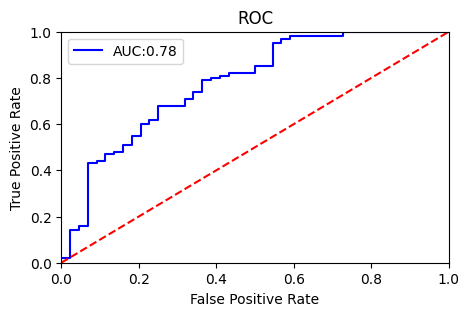

In [43]:
'''
# Plot the ROC-AUC plot
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
import matplotlib.pyplot as plt
pred_prob = log_model.predict_log_proba(X_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,pred_prob)
roc_auc = auc(fpr,tpr)
plt.figure(figsize=(5,3))
plt.title("ROC")
plt.plot(fpr,tpr,"b",Label="AUC:{}".format(round(roc_auc,2)))
plt.legend(loc=2)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
'''

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming 'log_model' is your logistic regression model and 'X_test', 'y_test' are your test data

pred_prob = log_model.predict_log_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5, 3))
plt.title("ROC")
plt.plot(fpr, tpr, "b", label="AUC:{}".format(round(roc_auc, 2)))
plt.legend(loc=2)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### <span style="color:red"> Lets apply the Logistic Regression Model with feature selection using Chi-Square Test of Independence.

In [44]:
df_loan1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,Y,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,Y,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,Y,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,Y,Urban,Y
4,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,Y,Urban,Y


In [45]:
# Takes only Categorical variables and do encoding
df_dummy2 =  pd.get_dummies(df_loan1[cat_col],drop_first=True)

In [46]:
df_dummy2.head()

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_Y,Property_Area_Semiurban,Property_Area_Urban
0,True,True,True,False,False,False,False,True,False,False
1,True,True,False,False,False,False,True,True,False,True
2,True,True,False,False,False,True,False,True,False,True
3,True,False,False,False,False,False,False,True,False,True
4,True,True,False,True,False,False,True,True,False,True


In [47]:
df_dummy2 = pd.concat([df_dummy2,df_loan1["Loan_Status"]],axis=1)
df_dummy2.head()
df_dummy2["Loan_Status"] = df_dummy2["Loan_Status"].apply(lambda x:0 if x=="N" else 1)

In [48]:
df_dummy2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Gender_Male              480 non-null    bool 
 1   Married_Yes              480 non-null    bool 
 2   Dependents_1             480 non-null    bool 
 3   Dependents_2             480 non-null    bool 
 4   Dependents_3+            480 non-null    bool 
 5   Education_Not Graduate   480 non-null    bool 
 6   Self_Employed_Yes        480 non-null    bool 
 7   Credit_History_Y         480 non-null    bool 
 8   Property_Area_Semiurban  480 non-null    bool 
 9   Property_Area_Urban      480 non-null    bool 
 10  Loan_Status              480 non-null    int64
dtypes: bool(10), int64(1)
memory usage: 8.6 KB


In [49]:
X_dummy = df_dummy2.iloc[:,0:-1]
y_dummy = df_dummy2["Loan_Status"]

In [50]:
# Apply sklearn ch2
ch2c=SelectKBest(score_func=chi2,k=10)
ch2c.fit(X_dummy,y_dummy)
features_score_pvalue=pd.DataFrame({"Score":ch2c.scores_,"P_Value":np.round(ch2c.pvalues_,3)},index=X_dummy.columns)
features_score_pvalue.nlargest(n=10,columns="Score")

,Score,P_Value
Credit_History_Y,19.617746,0.000
Property_Area_Semiurban,7.004777,0.008
Married_Yes,2.132101,0.144
Dependents_2,2.126247,0.145
Education_Not Graduate,1.793838,0.180
Property_Area_Urban,1.033540,0.309
Dependents_1,0.651254,0.420
Self_Employed_Yes,0.498920,0.480
Gender_Male,0.357829,0.550
Dependents_3+,0.014685,0.904


In [51]:
features_score_pvalue = features_score_pvalue[features_score_pvalue["P_Value"]<0.50]
selected_cat_cols = features_score_pvalue.index.values.tolist()

In [52]:
selected_cat_cols

['Married_Yes',
 'Dependents_1',
 'Dependents_2',
 'Education_Not Graduate',
 'Self_Employed_Yes',
 'Credit_History_Y',
 'Property_Area_Semiurban',
 'Property_Area_Urban']

In [53]:
num_cols = df_loan1.select_dtypes(include=["float64","int64"]).columns.to_list()
num_cols

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [54]:
selected_cols = selected_cat_cols + num_cols
#selected_cols = num_cols
#selected_cols = selected_cat_cols

In [55]:
selected_cols

['Married_Yes',
 'Dependents_1',
 'Dependents_2',
 'Education_Not Graduate',
 'Self_Employed_Yes',
 'Credit_History_Y',
 'Property_Area_Semiurban',
 'Property_Area_Urban',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term']

In [56]:
df_dummy1.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_Y,Property_Area_Semiurban,Property_Area_Urban
0,4583,1508.0,128.0,360.0,0,True,True,True,False,False,False,False,True,False,False
1,3000,0.0,66.0,360.0,1,True,True,False,False,False,False,True,True,False,True
2,2583,2358.0,120.0,360.0,1,True,True,False,False,False,True,False,True,False,True
3,6000,0.0,141.0,360.0,1,True,False,False,False,False,False,False,True,False,True
4,5417,4196.0,267.0,360.0,1,True,True,False,True,False,False,True,True,False,True


In [57]:
# Lets 
X_select = df_dummy1[selected_cols]
y_select = df_dummy1["Loan_Status"]

In [58]:
# Split the dataset in train and test
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc,classification_report,accuracy_score
Xs_train,Xs_test,ys_train,ys_test = train_test_split(X_select,y_select,test_size = 0.3,random_state = 42)

In [59]:
## Apply Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(Xs_train,ys_train)

LogisticRegression()

In [60]:
pred_reg = log_reg.predict(Xs_test)
print("Accuracy_bae_model :",accuracy_score(ys_test,pred_reg))
print("Classification Report :")
print(classification_report(ys_test,pred_reg))

Accuracy_bae_model : 0.8194444444444444
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.41      0.58        44
           1       0.79      1.00      0.88       100

    accuracy                           0.82       144
   macro avg       0.90      0.70      0.73       144
weighted avg       0.86      0.82      0.79       144

